# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multi-output ANN (iris dataset)
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [31]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# Import and process the data

In [30]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [ 10, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

print(f"a: {len(a)}\n{a}")
print(f"b: {len(b)}\n{b}")
print(f"c: {len(c)}\n{c}")
print('---')

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),np.zeros((nPerClust,1)) + 2))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

print(f"labels_np:\n{labels_np}")
print('---')
print(f"data_np:\n{data_np}")
print('---')

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

a: 2
[array([ 1.44568607e+00,  2.57187111e+00,  1.63506758e+00,  8.60992409e-01,
        3.03696590e-01, -5.30677394e-01, -7.44876785e-02,  2.28866329e+00,
       -1.04076527e+00,  3.25029836e+00,  3.33866510e-01,  4.06730666e-02,
        2.24070468e+00,  1.29644620e+00, -9.97055242e-01,  1.90009300e+00,
        2.36180079e-01,  1.19770829e+00,  6.69107057e-01,  1.55255373e+00,
        1.48277891e+00,  5.59739589e-01,  1.78871279e+00,  6.88439708e-01,
        2.34772067e+00,  1.04390299e-02,  6.25137590e-01,  1.32671124e-01,
        6.62071184e-01,  2.17898133e+00,  2.60298010e+00, -1.48279692e-01,
        2.02016713e+00,  1.70854232e+00,  3.35326322e+00,  2.25776322e+00,
        6.60856984e-02,  8.36120502e-01,  8.54436702e-01,  3.22197375e-02,
        2.26033134e+00, -1.42839474e+00,  4.04894733e-04,  1.84016750e+00,
        3.07187862e-01,  4.07809888e-01,  2.32542812e+00,  1.62066024e+00,
        8.52742685e-02,  1.12750503e+00,  1.20538690e+00,  1.39196256e+00,
        1.23269594e

In [35]:
# import dataset (comes with seaborn)
import seaborn as sns
# iris = sns.load_dataset('iris')
df = pd.DataFrame(np.concatenate((data_np, labels_np),1),columns=['feature1','feature2','label'])
# check out the first few lines of data
# iris.head()
df.head()

,feature1,feature2,label
0,1.445686,-0.352719,0.0
1,2.571871,1.014357,0.0
2,1.635068,1.407007,0.0
3,0.860992,2.675057,0.0
4,0.303697,1.688152,0.0


In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature1,300.0,5.336389,3.819051,-1.428395,1.827304,5.071008,9.361368,13.040478
feature2,300.0,0.879845,0.970312,-1.798692,0.212856,0.907686,1.504984,3.433509
label,300.0,1.000000,0.817861,0.000000,0.000000,1.000000,2.000000,2.000000


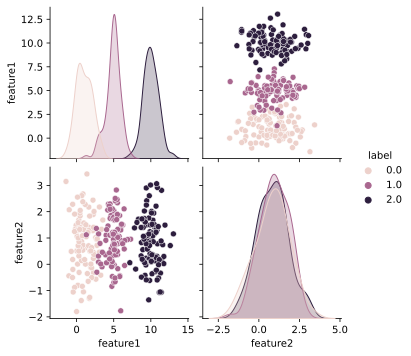

In [38]:
# some plots to show the data
sns.pairplot(df, hue='label',)
plt.show()

In [40]:
df.label

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
295    2.0
296    2.0
297    2.0
298    2.0
299    2.0
Name: label, Length: 300, dtype: float64

In [44]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( df[df.columns[0:2]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[df.label==1] = 1
labels[df.label==2] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Create the ANN model

In [45]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(2,8),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(8,16),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(16,3),   # output layer
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

# Train the model

In [46]:
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNiris(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNiris(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [47]:
yHat.shape

torch.Size([300, 3])

In [48]:
yHat[0]

tensor([ 1.4367,  0.8358, -1.4586], grad_fn=<SelectBackward0>)

In [49]:
torch.argmax(yHat,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [50]:
len(ongoingAcc)

1000

# Visualize the results

Final accuracy: 94.6667%


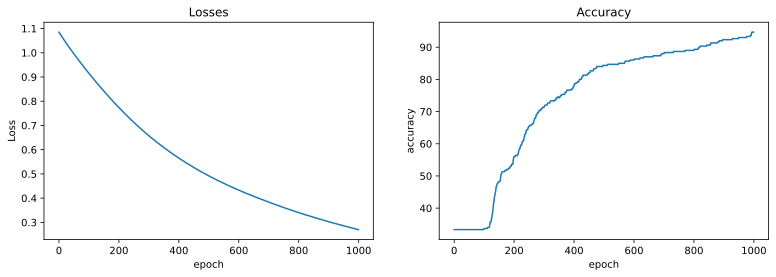

In [51]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [52]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

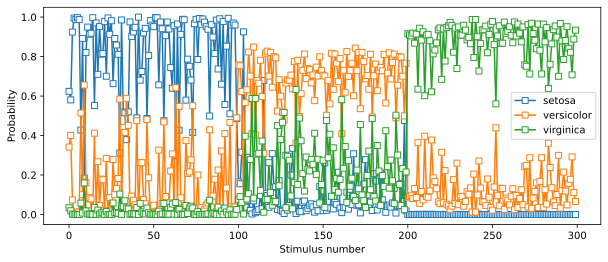

In [54]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()
# try it again without the softmax!

# Additional explorations

In [ ]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).
# 
# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?
# 
# 3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
#    are often more informative than the aggregated accuracy.
# 